In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)
#print(os.listdir("../input"))

In [51]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [52]:
print(df.shape)

(200, 5)


In [53]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [54]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [55]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [56]:
plt.style.use('fivethirtyeight')

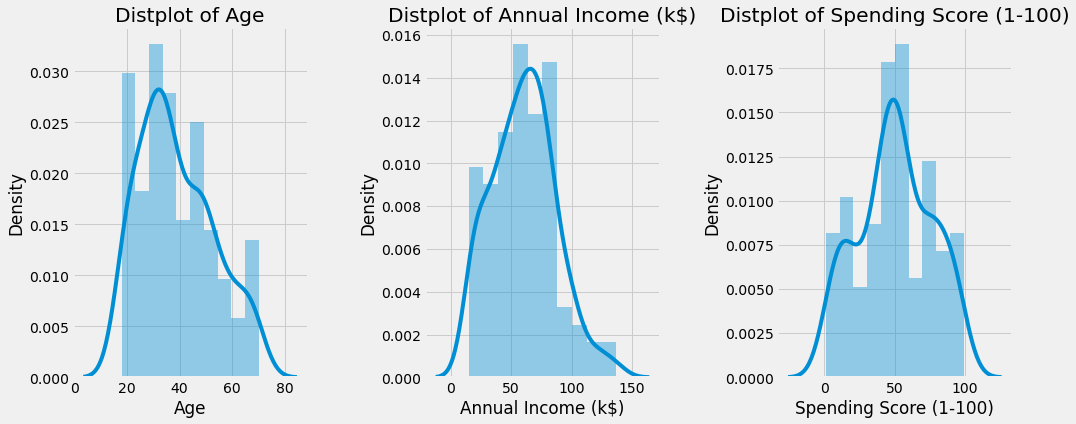

In [57]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.distplot(df[x] , bins = 10)
    plt.title('Distplot of {}'.format(x))
plt.show()

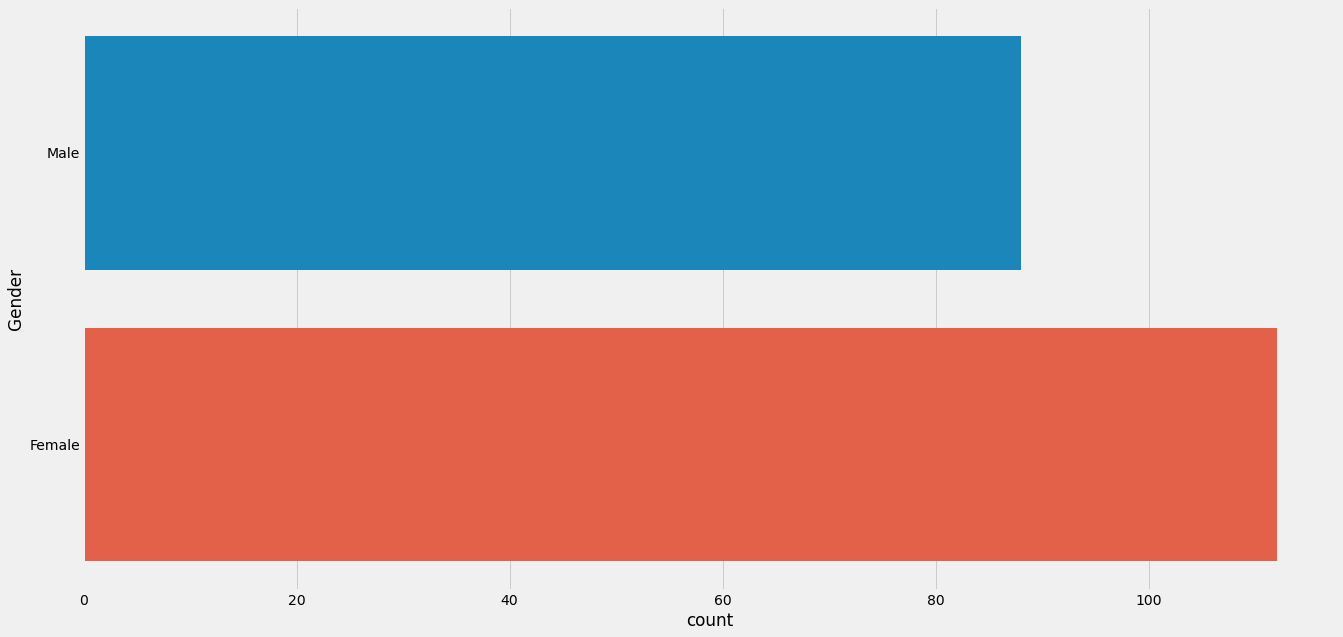

In [58]:
plt.figure(1 , figsize = (20 , 10))
sns.countplot(y = 'Gender' , data = df)
plt.show()

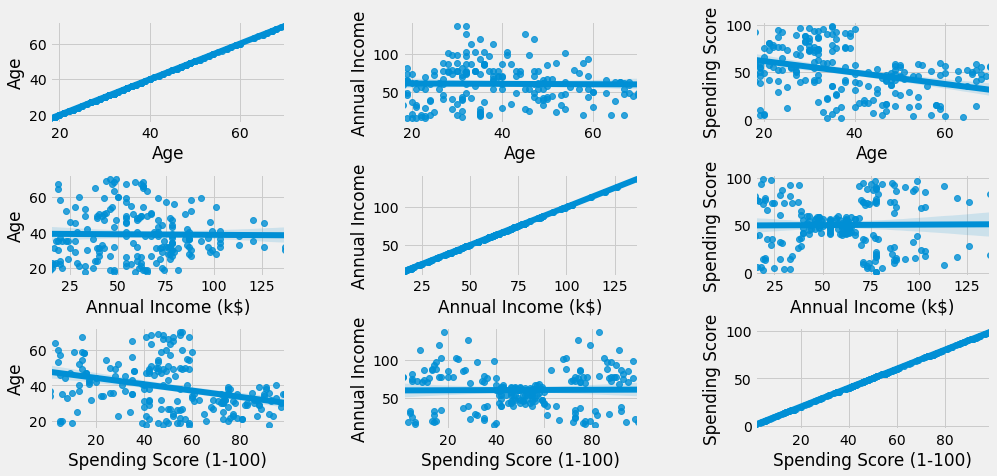

In [59]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n+=1
        plt.subplot(3,3,n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

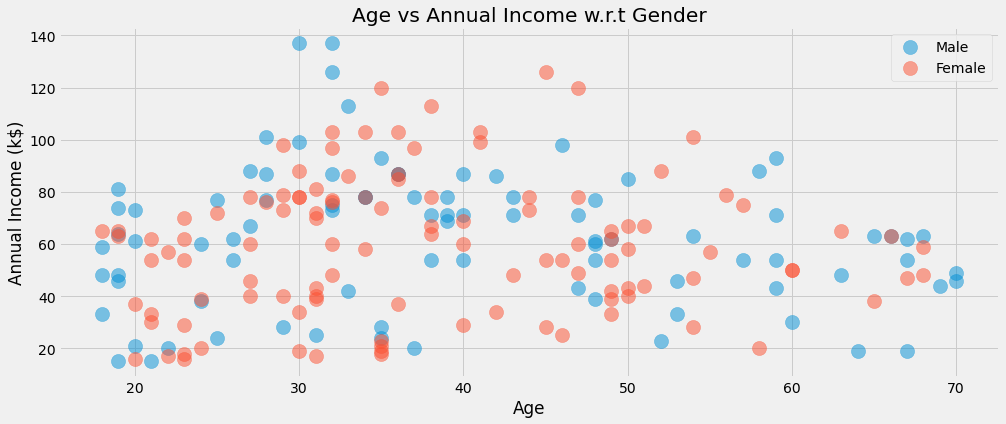

In [60]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age'), plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

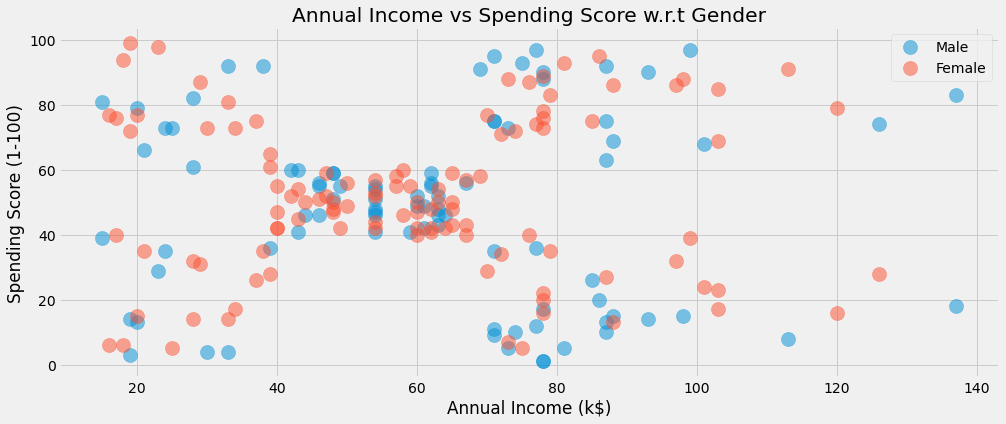

In [61]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

In [62]:
'''Age and spending Score'''
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

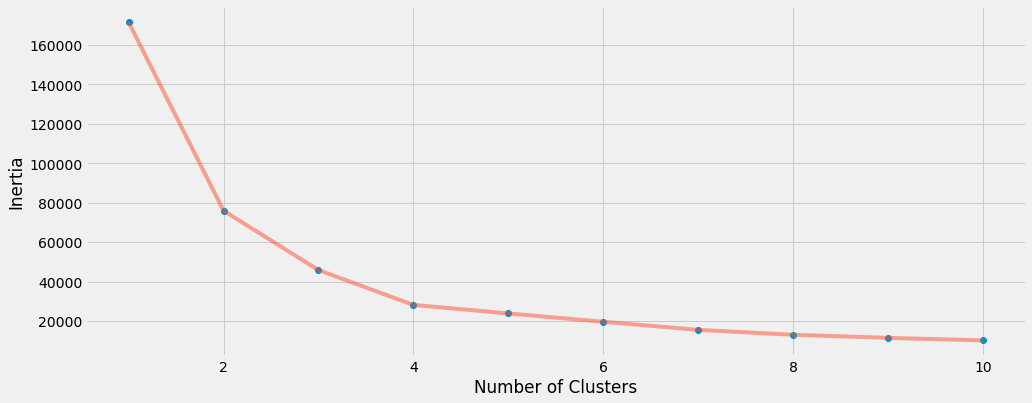

In [63]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [68]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_
print(centroids1)
print(labels1)

[[55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [27.61702128 49.14893617]]
[3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 3 3 2 1 3 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2
 1 2 1 0 1 0 3 2 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 1 3 1 0 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 0 1
 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [81]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 
print(xx,len(xx))
print(yy,len(yy))
print(Z,len(Z))

[[17.   17.02 17.04 ... 70.94 70.96 70.98]
 [17.   17.02 17.04 ... 70.94 70.96 70.98]
 [17.   17.02 17.04 ... 70.94 70.96 70.98]
 ...
 [17.   17.02 17.04 ... 70.94 70.96 70.98]
 [17.   17.02 17.04 ... 70.94 70.96 70.98]
 [17.   17.02 17.04 ... 70.94 70.96 70.98]] 5000
[[0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.000e-02 2.000e-02 2.000e-02 ... 2.000e-02 2.000e-02 2.000e-02]
 [4.000e-02 4.000e-02 4.000e-02 ... 4.000e-02 4.000e-02 4.000e-02]
 ...
 [9.994e+01 9.994e+01 9.994e+01 ... 9.994e+01 9.994e+01 9.994e+01]
 [9.996e+01 9.996e+01 9.996e+01 ... 9.996e+01 9.996e+01 9.996e+01]
 [9.998e+01 9.998e+01 9.998e+01 ... 9.998e+01 9.998e+01 9.998e+01]] 5000
[2 2 2 ... 1 1 1] 13500000


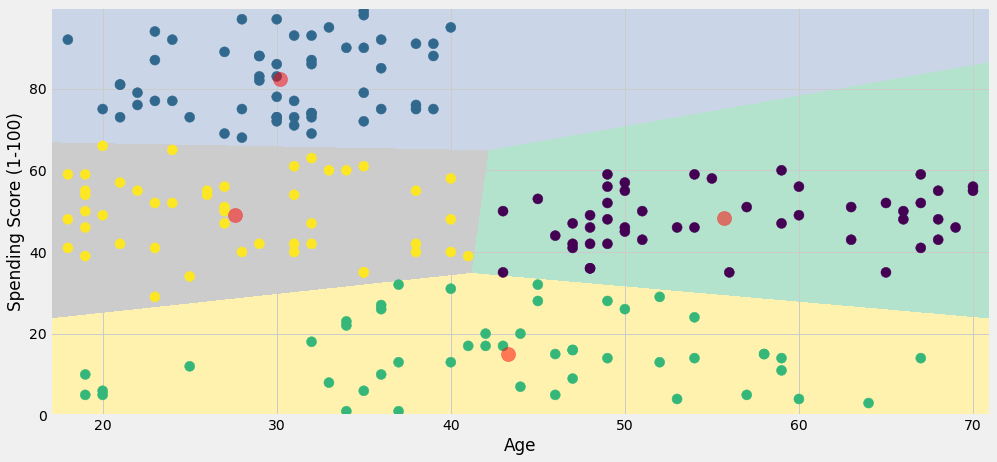

In [80]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 100 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 200 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

In [95]:
n=0
male=[]
female=[]
for i in labels1:
    if(df['Gender'].iloc[n] == 'Male'):
        male.append(i)
    else:
        female.append(i)
    n+=1
a.sort()
print(a)

[(0, 'Female'), (0, 'Female'), (0, 'Female'), (0, 'Female'), (0, 'Female'), (0, 'Female'), (0, 'Female'), (0, 'Female'), (0, 'Female'), (0, 'Female'), (0, 'Female'), (0, 'Female'), (0, 'Female'), (0, 'Female'), (0, 'Female'), (0, 'Female'), (0, 'Female'), (0, 'Female'), (0, 'Female'), (0, 'Female'), (0, 'Female'), (0, 'Female'), (0, 'Female'), (0, 'Female'), (0, 'Female'), (0, 'Female'), (0, 'Male'), (0, 'Male'), (0, 'Male'), (0, 'Male'), (0, 'Male'), (0, 'Male'), (0, 'Male'), (0, 'Male'), (0, 'Male'), (0, 'Male'), (0, 'Male'), (0, 'Male'), (0, 'Male'), (0, 'Male'), (0, 'Male'), (0, 'Male'), (0, 'Male'), (0, 'Male'), (0, 'Male'), (0, 'Male'), (0, 'Male'), (0, 'Male'), (1, 'Female'), (1, 'Female'), (1, 'Female'), (1, 'Female'), (1, 'Female'), (1, 'Female'), (1, 'Female'), (1, 'Female'), (1, 'Female'), (1, 'Female'), (1, 'Female'), (1, 'Female'), (1, 'Female'), (1, 'Female'), (1, 'Female'), (1, 'Female'), (1, 'Female'), (1, 'Female'), (1, 'Female'), (1, 'Female'), (1, 'Female'), (1, 'Fem

In [98]:
male = np.array(male)
female = np.array(female)

In [101]:
print(male)
print(female)

[3 1 2 2 2 1 3 2 3 1 1 1 3 2 2 1 1 0 3 0 0 0 0 0 3 0 3 3 0 0 3 3 0 3 0 0 3
 0 3 0 3 0 3 0 0 0 0 0 3 3 1 0 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 2 2 2 2 3 2
 1 2 1 2 1 2 1 2 1 1 2 1 2 1]
[2 1 3 1 2 1 1 1 2 1 3 1 2 2 2 2 1 1 2 1 2 1 2 1 0 3 2 3 0 3 3 3 0 3 0 0 3
 0 0 0 0 3 0 0 0 0 3 0 0 3 0 3 3 0 0 3 3 0 3 3 0 3 0 3 3 3 3 0 0 0 0 3 3 3
 1 3 1 1 2 1 2 3 1 1 2 2 1 2 1 1 1 0 1 1 1 1 2 2 1 2 1 1 3 2 2 1 2 1 1 2 1
 2]


(array([22.,  0.,  0., 24.,  0.,  0., 24.,  0.,  0., 18.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

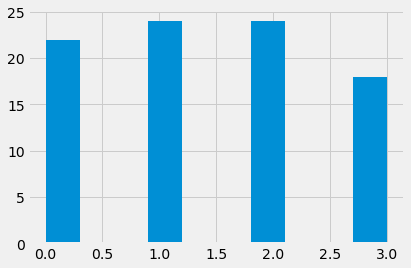

In [102]:
plt.hist(male)

(array([26.,  0.,  0., 33.,  0.,  0., 24.,  0.,  0., 29.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

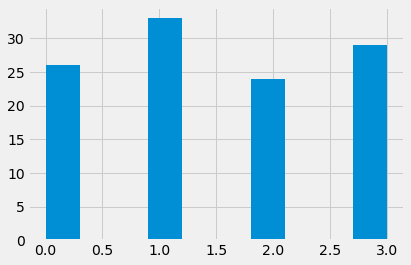

In [103]:
plt.hist(female)